# Image list for a Data Release

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [71]:
df= pd.read_csv("mosaic_ooi.txt",header=None,names=['absfn'],dtype=str)
df.head()

,absfn
0,/project/projectdirs/cosmo/staging/mosaicz/MZL...
1,/project/projectdirs/cosmo/staging/mosaicz/MZL...
2,/project/projectdirs/cosmo/staging/mosaicz/MZL...
3,/project/projectdirs/cosmo/staging/mosaicz/MZL...
4,/project/projectdirs/cosmo/staging/mosaicz/MZL...


In [72]:
df['absfn'][0]

'/project/projectdirs/cosmo/staging/mosaicz/MZLS_CP/CP20160202v2/k4m_160203_015632_ooi_zd_v2.fits.fz'

In [73]:
junk='/project/projectdirs/cosmo/staging/mosaicz/MZLS_CP/'
df['cpdir']= df['absfn'].str.replace(junk,'').str.split('/').str[0]
df['fn']= df['absfn'].str.split('/').str[-1]

In [77]:
df.set_index?

In [78]:
df['NOv']= df['cpdir'].str.extract(r'(CP[0-9]{8})')
df.set_index('NOv',inplace=True)

/Users/kaylan1/miniconda3/envs/ds100/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [83]:
df['fn_end']= df['fn'].str.split('_').str[-1]
set(df['fn_end'])

{'v1.fits.fz', 'v2.fits.fz', 'v3.fits.fz'}

In [180]:
v1= df[df['fn_end'] == 'v1.fits.fz']
v2= df[df['fn_end'] == 'v2.fits.fz']
v3= df[df['fn_end'] == 'v3.fits.fz']
v1.head()

,absfn,cpdir,fn,fn_end
NOv,,,,
CP20160318,/project/projectdirs/cosmo/staging/mosaicz/MZL...,CP20160318,k4m_160319_022503_ooi_zd_v1.fits.fz,v1.fits.fz
CP20160318,/project/projectdirs/cosmo/staging/mosaicz/MZL...,CP20160318,k4m_160319_023531_ooi_zd_v1.fits.fz,v1.fits.fz
CP20160318,/project/projectdirs/cosmo/staging/mosaicz/MZL...,CP20160318,k4m_160319_023732_ooi_zd_v1.fits.fz,v1.fits.fz
CP20160318,/project/projectdirs/cosmo/staging/mosaicz/MZL...,CP20160318,k4m_160319_023943_ooi_zd_v1.fits.fz,v1.fits.fz
CP20160318,/project/projectdirs/cosmo/staging/mosaicz/MZL...,CP20160318,k4m_160319_024203_ooi_zd_v1.fits.fz,v1.fits.fz


In [164]:
len(set(v1['fn'])),len(set(v2['fn'])),len(set(v3['fn']))

(25060, 20620, 12408)

In [165]:
v1.shape,v2.shape,v3.shape

((25060, 4), (20620, 4), (12408, 4))

In [183]:
# Cannot join b/c NOv not unique, so get many duplicates
notinV2= list(set(v1.index).difference(set(v2.index)))
notinV2[:10]

['CP20170609',
 'CP20170429',
 'CP20170204',
 'CP20170521',
 'CP20170805',
 'CP20170909',
 'CP20170324',
 'CP20170409',
 'CP20170126',
 'CP20170302']

In [186]:
useV1= v1.loc[notinV2,:]
useV1.shape,v1.shape
#merged= pd.merge(v2,v1,how='outer',left_index=True,right_index=True,
#                 suffixes=('_v2','_v1'))
#print(merged.shape)
#merged.head()

((24792, 4), (25060, 4))

In [187]:
useV1['date']= pd.to_datetime(useV1.index.str.replace('CP',''), 
                              format='%Y%m%d')
##
v2['date']= pd.to_datetime(v2.index.str.replace('CP',''), 
                              format='%Y%m%d')

/Users/kaylan1/miniconda3/envs/ds100/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/kaylan1/miniconda3/envs/ds100/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [194]:
useV1_counts= (useV1['date'].value_counts()
            .rename('count').to_frame()
            .sort_index())
v2_counts= (v2['date'].value_counts()
            .rename('count').to_frame()
            .sort_index())
v2_counts.head()

,count
2016-02-02,234
2016-02-03,217
2016-02-04,243
2016-02-05,220
2016-02-06,251


In [204]:
useV1_counts.index.month

Int64Index([10,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
             9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
           dtype='int64', length=152)

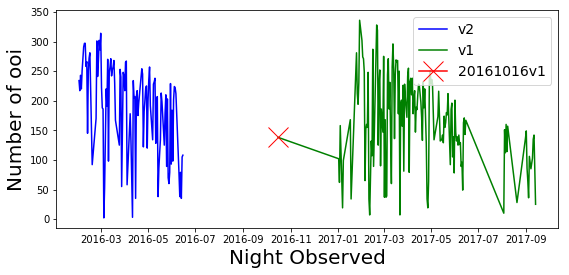

In [224]:
fig,ax=plt.subplots(figsize=(9,4))
ax.plot(v2_counts.index,v2_counts['count'],c='b',label='v2')
ax.plot(useV1_counts.index,useV1_counts['count'],c='g',label='v1')
iMid= ((useV1_counts.index.month == 10) & 
       (useV1_counts.index.year == 2016))
ax.plot(useV1_counts.index[iMid],useV1_counts['count'][iMid],
        marker='x',ms=20,c='r',label='20161016v1')
ax.legend(fontsize=14)
ax.set_xlabel("Night Observed",fontsize=20)
ax.set_ylabel("Number of ooi",fontsize=20)
plt.savefig("mosaic_ooi.png",dpi=150)



In [188]:
tally= (v2.loc[:,['date']]
        .groupby(['date']).count()
        .sort_index()
       )
tally.head()

""
date
2016-02-02
2016-02-03
2016-02-04
2016-02-05
2016-02-06


In [166]:
hasV2= ~merged['fn_v2'].isnull()
hasV1noV2= (~hasV2) & (~merged['fn_v1'].isnull())
merged.shape[0],merged[hasV2].shape[0]+merged[hasV1noV2].shape[0]
                  
#merged.shape,merged[~merged['cpdir_v2'].isnull()].shape
#final.head().to_csv(sys.stdout)

(116968, 116968)

In [171]:
final= merged[(hasV2) | (hasV1noV2)]
print(final.shape)
final.head()
                  

(116968, 8)


,absfn_v2,cpdir_v2,fn_v2,fn_end_v2,absfn_v1,cpdir_v1,fn_v1,fn_end_v1
NOv,,,,,,,,
CP20160202,/project/projectdirs/cosmo/staging/mosaicz/MZL...,CP20160202v2,k4m_160203_015632_ooi_zd_v2.fits.fz,v2.fits.fz,NaN,NaN,NaN,NaN
CP20160202,/project/projectdirs/cosmo/staging/mosaicz/MZL...,CP20160202v2,k4m_160203_021214_ooi_zd_v2.fits.fz,v2.fits.fz,NaN,NaN,NaN,NaN
CP20160202,/project/projectdirs/cosmo/staging/mosaicz/MZL...,CP20160202v2,k4m_160203_022107_ooi_zd_v2.fits.fz,v2.fits.fz,NaN,NaN,NaN,NaN
CP20160202,/project/projectdirs/cosmo/staging/mosaicz/MZL...,CP20160202v2,k4m_160203_022518_ooi_zd_v2.fits.fz,v2.fits.fz,NaN,NaN,NaN,NaN
CP20160202,/project/projectdirs/cosmo/staging/mosaicz/MZL...,CP20160202v2,k4m_160203_022936_ooi_zd_v2.fits.fz,v2.fits.fz,NaN,NaN,NaN,NaN


In [168]:
final['date']= pd.to_datetime(final.index.str.replace('CP',''), 
               format='%Y%m%d')

In [170]:
final.shape

(116968, 9)

In [169]:
final.head()

,absfn_v2,cpdir_v2,fn_v2,fn_end_v2,absfn_v1,cpdir_v1,fn_v1,fn_end_v1,date
NOv,,,,,,,,,
CP20160202,/project/projectdirs/cosmo/staging/mosaicz/MZL...,CP20160202v2,k4m_160203_015632_ooi_zd_v2.fits.fz,v2.fits.fz,NaN,NaN,NaN,NaN,2016-02-02
CP20160202,/project/projectdirs/cosmo/staging/mosaicz/MZL...,CP20160202v2,k4m_160203_021214_ooi_zd_v2.fits.fz,v2.fits.fz,NaN,NaN,NaN,NaN,2016-02-02
CP20160202,/project/projectdirs/cosmo/staging/mosaicz/MZL...,CP20160202v2,k4m_160203_022107_ooi_zd_v2.fits.fz,v2.fits.fz,NaN,NaN,NaN,NaN,2016-02-02
CP20160202,/project/projectdirs/cosmo/staging/mosaicz/MZL...,CP20160202v2,k4m_160203_022518_ooi_zd_v2.fits.fz,v2.fits.fz,NaN,NaN,NaN,NaN,2016-02-02
CP20160202,/project/projectdirs/cosmo/staging/mosaicz/MZL...,CP20160202v2,k4m_160203_022936_ooi_zd_v2.fits.fz,v2.fits.fz,NaN,NaN,NaN,NaN,2016-02-02


In [150]:
final['isV2']= np.zeros(final.shape[0]).astype(int)
isV2= ~final['fn_end_v2'].isnull()
final.loc[isV2,'isV2']= 1
final['isV1']= np.zeros(final.shape[0]).astype(int)
isV1= ~final['fn_end_v1'].isnull()
final.loc[isV1,'isV1']= 1
final.head()

,absfn_v1,absfn_v2,fn_end_v1,fn_end_v2,date,isV2,isV1
NOv,,,,,,,
CP20160202,NaN,/project/projectdirs/cosmo/staging/mosaicz/MZL...,NaN,v2.fits.fz,2016-02-02,1,0
CP20160202,NaN,/project/projectdirs/cosmo/staging/mosaicz/MZL...,NaN,v2.fits.fz,2016-02-02,1,0
CP20160202,NaN,/project/projectdirs/cosmo/staging/mosaicz/MZL...,NaN,v2.fits.fz,2016-02-02,1,0
CP20160202,NaN,/project/projectdirs/cosmo/staging/mosaicz/MZL...,NaN,v2.fits.fz,2016-02-02,1,0
CP20160202,NaN,/project/projectdirs/cosmo/staging/mosaicz/MZL...,NaN,v2.fits.fz,2016-02-02,1,0


In [154]:
tally= (final.loc[:,['date','isV2','isV1']]
        .groupby(['date']).sum()
        .sort_index()
       )
tally.head()

,isV2,isV1
date,,
2016-02-02,234,0
2016-02-03,217,0
2016-02-04,243,0
2016-02-05,220,0
2016-02-06,251,0


In [159]:
tally.iloc[tally['isV2'].argmax(),:]

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

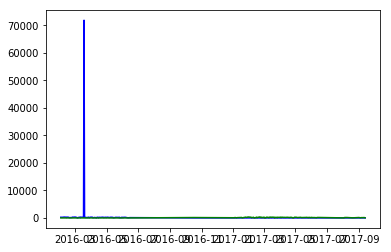

In [155]:
plt.plot(tally.index,tally['isV2'],c='b',label='v2')
plt.plot(tally.index,tally['isV1'],c='g',label='v1')


In [47]:
import sys
(df[df['cpdir'].isnull()]
 .iloc[0,:]
 .to_csv(sys.stdout))

IndexError: single positional indexer is out-of-bounds